\


This is a very `minimalist` introductory Jupyter notebook intended to run on `Google Colab` to briefly show how `easyXRD` works.\
See the next notebook `02_intermediate.ipynb` for more advanced features once you successfully run all cells in this notebook.

\

<table class="ee-notebook-buttons" align="left"><td>
<a target="_blank"  href="https://colab.research.google.com/github/MehmetTopsakal/easyXRD/blob/main/examples/01_basic.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" /> Run in this notebook on Google Colab</a>
</td><td>
<a target="_blank"  href="https://github.com/MehmetTopsakal/easyXRD/blob/main/examples/01_basic.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /> View source on GitHub</a></td></table>

\

In order to run this notebook on Google Colab (https://colab.research.google.com/), we need to pull:

* `easyXRD` [package](https://github.com/MehmetTopsakal/easyXRD) from GitHub,

* A `Intensity-vs-TwoTheta` plain text file that contains XRD data: [LaB6_synchrotron_XRD_from_28ID-2.xy](https://raw.githubusercontent.com/MehmetTopsakal/easyXRD/refs/heads/main/examples/data/LaB6/LaB6_synchrotron_XRD_from_28ID-2.xy) from GitHub,

* A `cif file` that contains structural data for LaB6 powder measured at 28ID-2 (XPD) beamline of NSLS-2 [LaB6_cif](https://raw.githubusercontent.com/MehmetTopsakal/easyXRD/refs/heads/main/examples/data/LaB6/LaB6_structure_from_MaterialsProject.cif) from GitHub,

* A `zip` file that contains GSAS-II python files from a Google Drive [link](https://drive.google.com/file/d/1IVwLaPvMjP3kZGgA4la4XBROY4pDjb9j/view?usp=sharing) and extract it to colab instance.

All you need to do is to upload this notebook file to your Google Drive and enable "Google Colab" service on your account. There are plenty of resources
web resources on how to enable use Google Colab. Below is some of those:

* https://github.com/MehmetTopsakal/pySULI/blob/main/notebooks/000_using_google_colab.ipynb
* https://appliedsciences.nasa.gov/sites/default/files/2023-08/Google%20Colab%20Setup%20Instructions.pdf
* https://www.geeksforgeeks.org/how-to-use-google-colab/





By executing the next cell (`Shift + Enter`) , we do all these necessary steps above. Note that everything runs on Google Colab!

In [ ]:
# This clones easyXRD repo from GitHub
!! git clone https://github.com/MehmetTopsakal/easyXRD.git
# This gets LaB6_synchrotron_XRD_from_28ID-2.xy file from GitHub
!! wget https://raw.githubusercontent.com/MehmetTopsakal/easyXRD/refs/heads/main/examples/data/LaB6/LaB6_synchrotron_XRD_from_28ID-2.xy
# This gets LaB6_structure_from_MaterialsProject.cif file from GitHub
!! wget https://raw.githubusercontent.com/MehmetTopsakal/easyXRD/refs/heads/main/examples/data/LaB6/LaB6_structure_from_MaterialsProject.cif

done!


In [ ]:
%%bash
# this installs GSAS-II to google colab instance
g2="https://github.com/AdvancedPhotonSource/GSAS-II-buildtools/releases/download/v1.0.1/gsas2full-Latest-Linux-x86_64.sh"
curl -L "$g2" > /tmp/g2.sh; bash /tmp/g2.sh -ub -p ~/g2full

In [ ]:
import sys
sys.path += ["easyXRD"] # Adding easyXRD python package that we cloned from GitHub into sys
from easyxrd.core import exrd # import exrd class

# importing matplotlib for plots with interactive support.
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.constrained_layout.use"] = True # For better plots.

# Enabling custom widget for "%matplotlib widget" line above to work in Colab
from google.colab import output
output.enable_custom_widget_manager()



Checking required packages:

---scipy package with version 1.13.1 is available and can be imported 
---pybaselines package with version 1.1.0 is available and can be imported 
---pymatgen package with version 2024.10.3 is available and can be imported 
---ipympl package with version 0.9.4 is available and can be imported 
---numpy package with version 1.26.4 is available and can be imported 
---xarray package with version 2024.9.0 is available and can be imported 
---pyFAI package with version 2024.9.0 is available and can be imported 
---pandas package with version 2.2.2 is available and can be imported 
---mp_api package with version 0.42.2 is available and can be imported 
---fabio package with version 2024.9.0 is available and can be imported 


Imported easyxrd with the following configuration:

easyxrd_scratch_path : /root/.easyxrd_scratch
gsasii_lib_path : /root/g2full/GSAS-II/GSASII
mp_api_key : none......


In [25]:
# At first, we need to init exrd object.
sample = exrd()

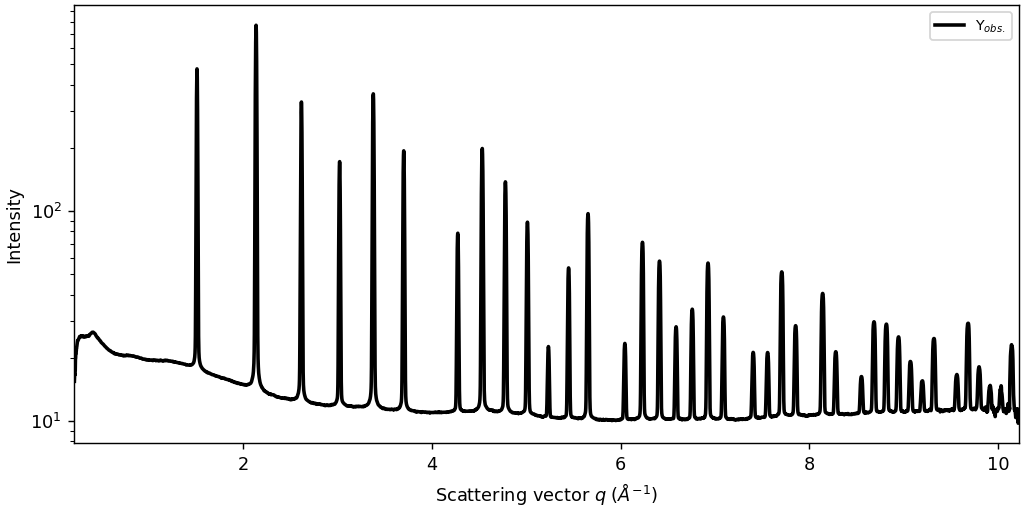

In [26]:
# Here we load LaB6_synchrotron_XRD_from_28ID-2.xy plain text file we pulled from GitHub.
# It contains two columns. First column is Two Theta, second column is Intensity.
# This data was collected at 28ID-2 (XPD) beamline of NSLS-II.
# See https://www.bnl.gov/nsls2/beamlines/beamline.php?r=28-ID-2
# For plain text files loaded with load_xrd_data function, we need to know the wavelength.
# It is 0.1814 Angst. XRD data in here is from NIST Lanthanum Hexaboride (LaB6) powder.
# https://tsapps.nist.gov/srmext/certificates/660c.pdf

sample.load_xrd_data(
    from_txt_file="LaB6_synchrotron_XRD_from_28ID-2.xy",
    txt_file_wavelength_in_angstrom=0.1814,
    plot=True,
)

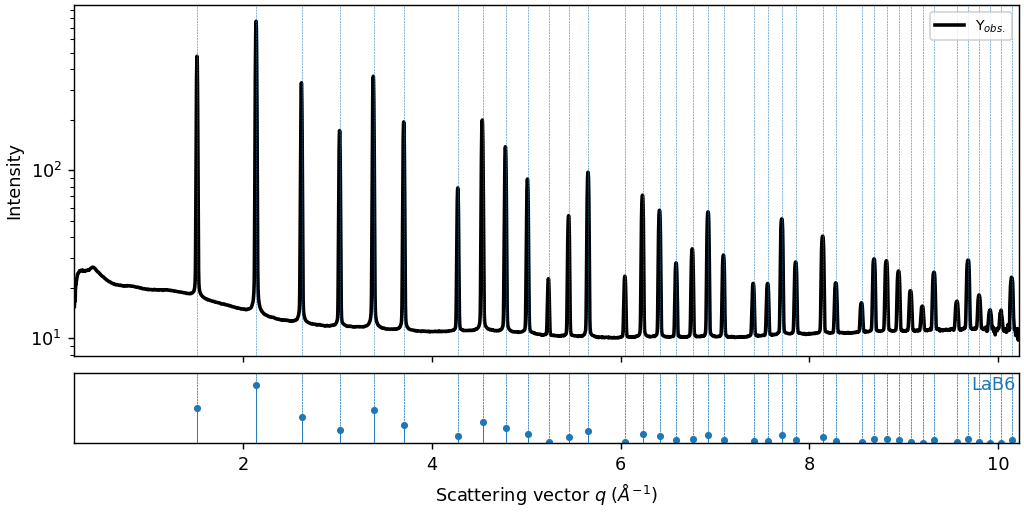

In [27]:
# As next, we need to load a cif file corresponding to expected phases in loaded XRD data.
# As the poswer is LaB6, The LaB6_structure_from_MaterialsProject.cif is a CIF file that we
# got from Materials Project: https://next-gen.materialsproject.org/materials/mp-2680
#

phases = [
    {
        "cif": "LaB6_structure_from_MaterialsProject.cif",
        "label": "LaB6",
    },
]
sample.load_phases(phases, plot=True)

# As you see below, new we have a new subplot with blue stem lines calculated for provided cif file.
# Agreement is good and there is no unidentified peaks except a background peat at low q.

If you zoom in figure above, you will see that the expected lines from simulated XRD of cif file doesn't match with the max of Yobs peaks. As highlighted by red arrows below for peak at 6.04 q A^inv.

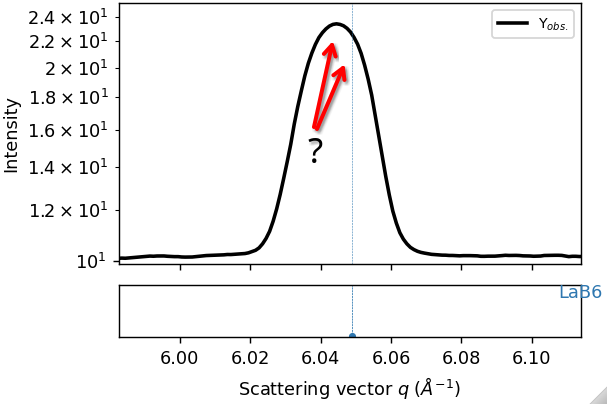


This is expected as the LaB6 cif file we got from Materials Project may not be correct as they are obtained by DFT simulations.

Therefore, we will perform XRD refinement to get correct structural information as we will demonstrate below.



 ⏩--1st refinement with LeBail is completed. Rwp/GoF is 31.222/1.355 



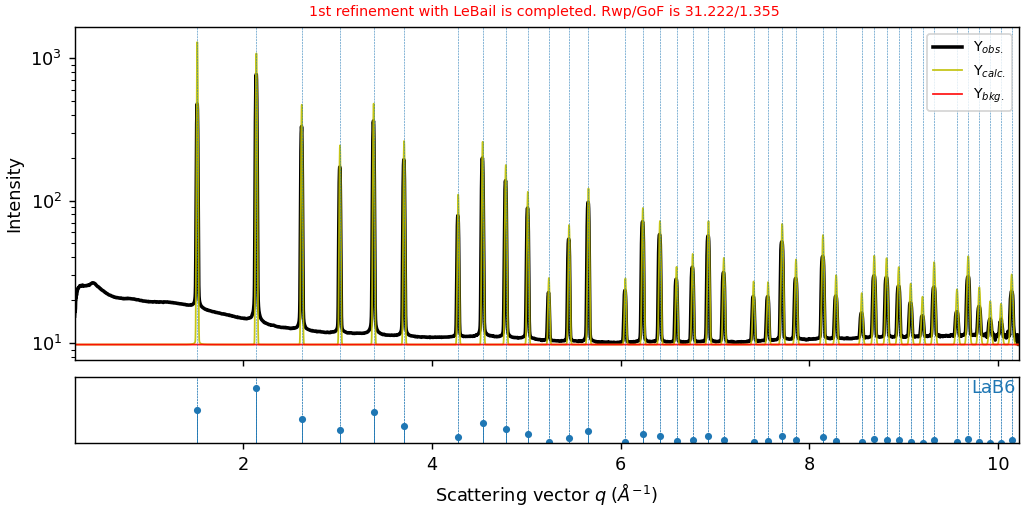

In [28]:
# Here we initiate GSAS-II refiner (setup_gsas2_refiner).
# Basically, we export the data into a scratch folder and load data, instrument parameter and structural information
# to the GSAS. Then, an initial refinement is performed to see how is the starting refinement.

sample.setup_gsas2_refiner(
    plot=True,
)

# As you see below, refinement is not good because of the following reasons:
# - we didn't refine the background.
# - we didn't refine the instrument parameters
# - we didn't refine the cell parameters.

# You can zoom in using rectangele tool on the left side of the plot.

 ✅--Background with 10 coeffs is refined. Rwp/GoF is now 19.033/0.827 (was 31.222(-39.04%)/1.355(-39.01%✨))


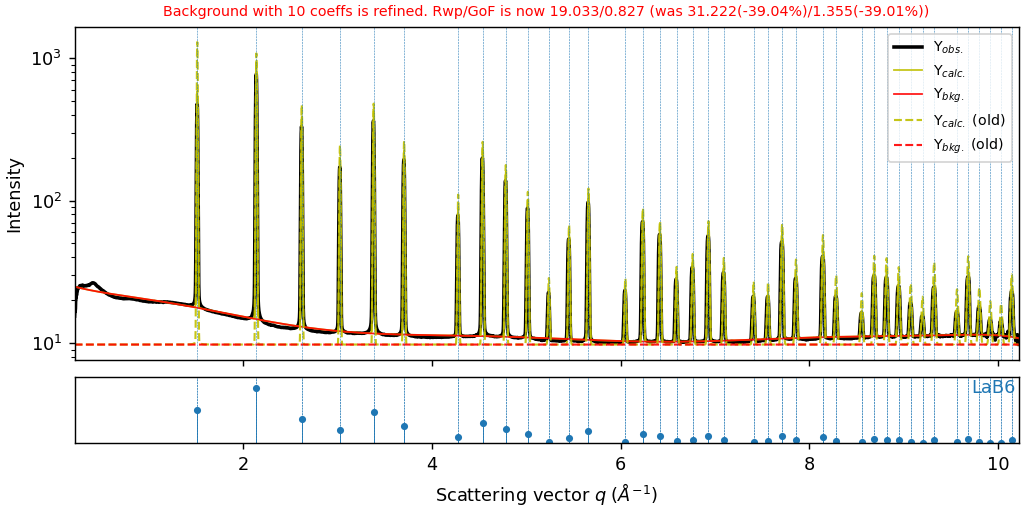

In [29]:
# Here we do the background refinement. By default, background is estimated with
# Chebyshev polynomials with 10 coeeficients.

sample.refine_background(plot=True)

# As you see below, code is able to estimate the background. As a result, Goodnes of Fit (GoF)
# and weighted profile residual (Rwp) are lowered significantly. Title of the figure generated below
# includes some values about the refinement process.

 ✅--Cell parameters are refined. Rwp/GoF is now 9.642/0.419 (was 19.033(-49.34%)/0.827(-49.37%✨))


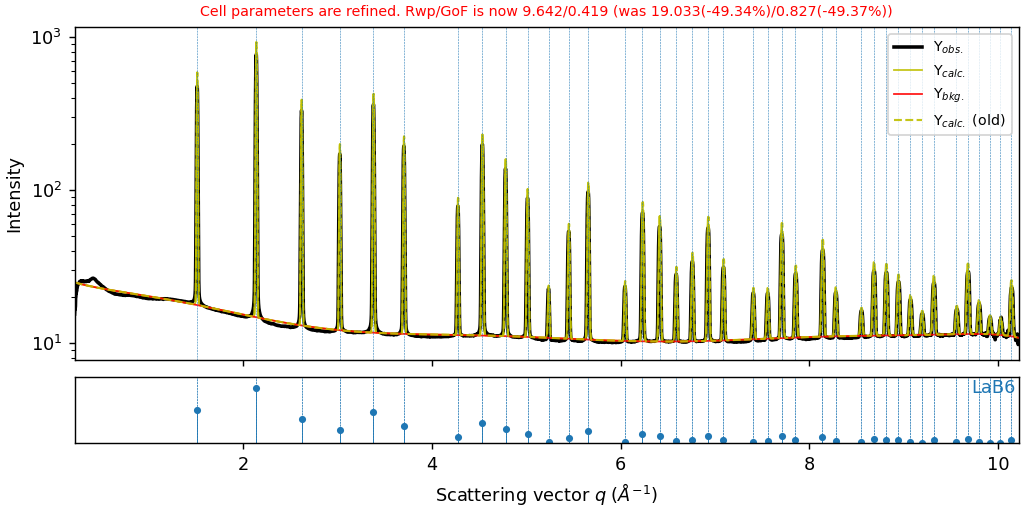

In [30]:
# As next, we refine the cell parameters.

sample.refine_cell_parameters(plot=True)

# Again, Rwp and GoF values are significantly improved (lowered).
# You can zoom into peak at around 6.04 q A^inv and see how it was improved.

 ✅--Instrument parameter ['U'] is refined. Rwp/GoF is now 7.740/0.336 (was 9.642(-19.72%)/0.419(-19.72%✨))
 ✅--Instrument parameter ['V'] is refined. Rwp/GoF is now 7.330/0.318 (was 7.740(-5.31%)/0.336(-5.31%))
 ✅--Instrument parameter ['W'] is refined. Rwp/GoF is now 7.108/0.309 (was 7.330(-3.03%)/0.318(-3.03%))
 ✅--Instrument parameter ['Zero'] is refined. Rwp/GoF is now 6.933/0.301 (was 7.108(-2.46%)/0.309(-2.46%))


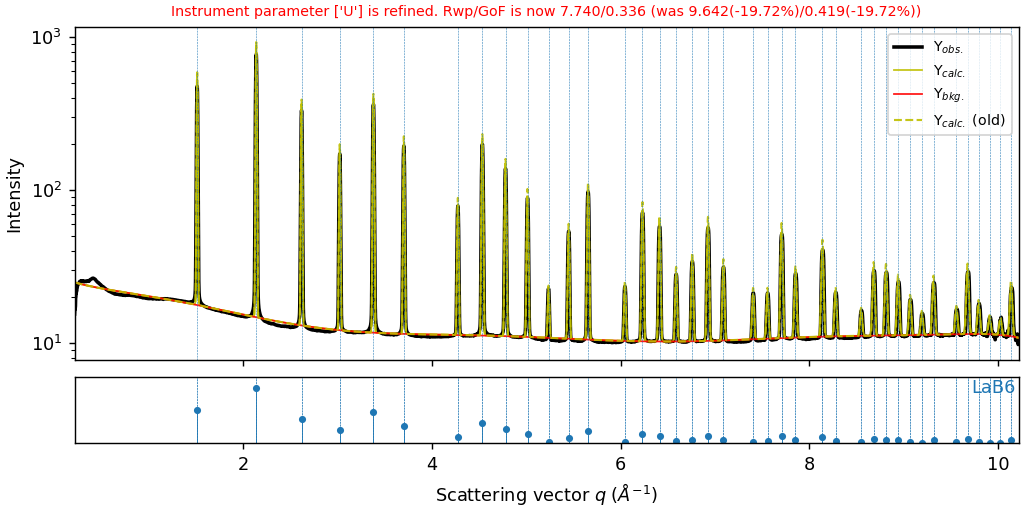

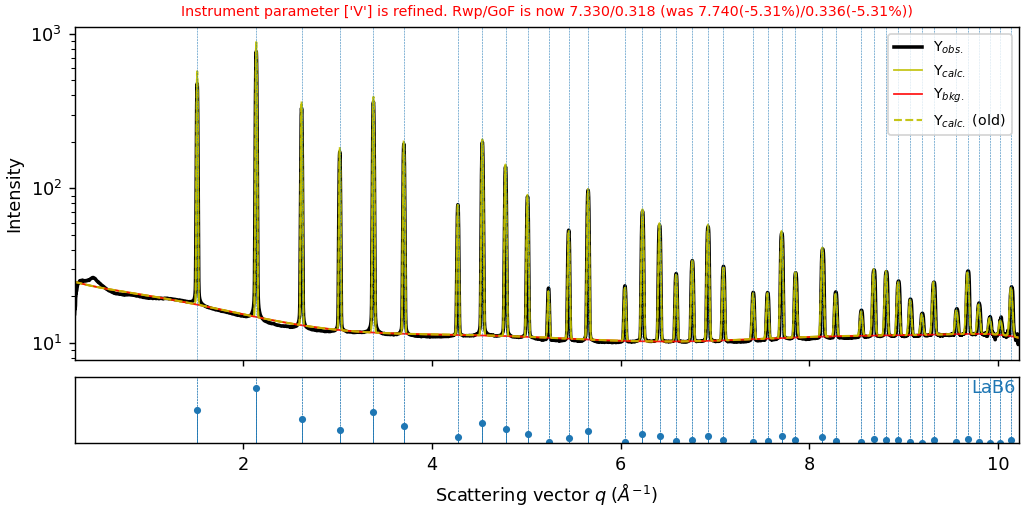

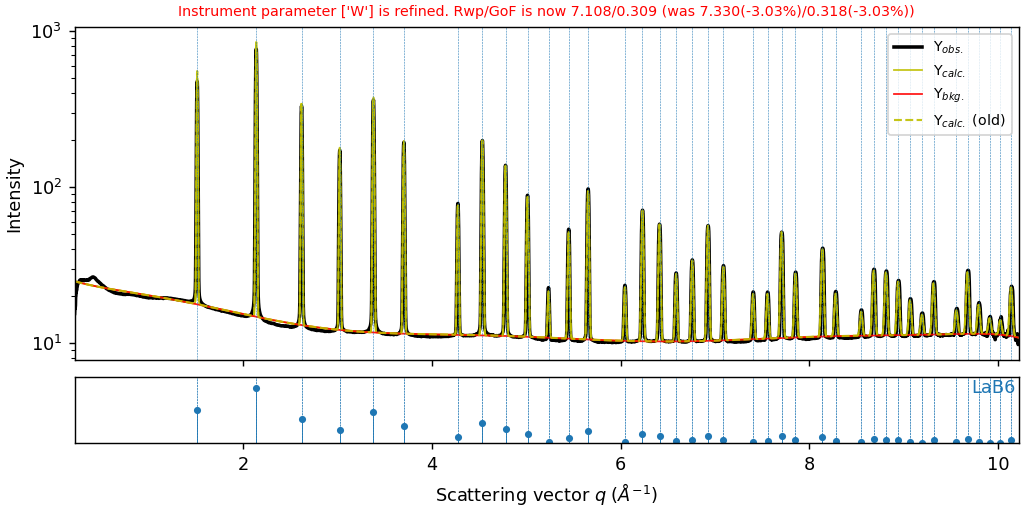

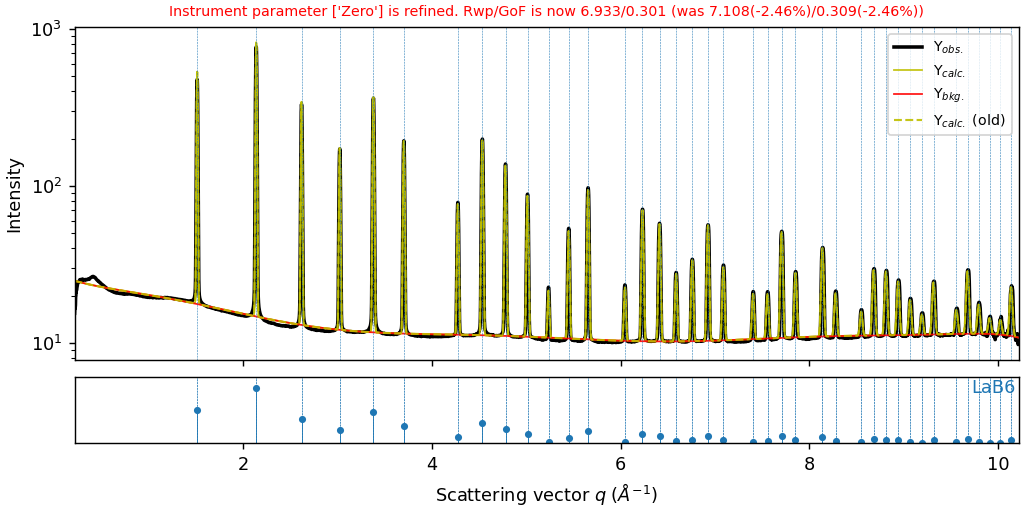

In [31]:
# Next we refine Instrument Parameters one by one. U, V, W, Zero are refined below.

sample.refine_instrument_parameters(inst_pars_to_refine=["U"], plot=True)
sample.refine_instrument_parameters(inst_pars_to_refine=["V"], plot=True)
sample.refine_instrument_parameters(inst_pars_to_refine=["W"], plot=True)
sample.refine_instrument_parameters(inst_pars_to_refine=["Zero"], plot=True)

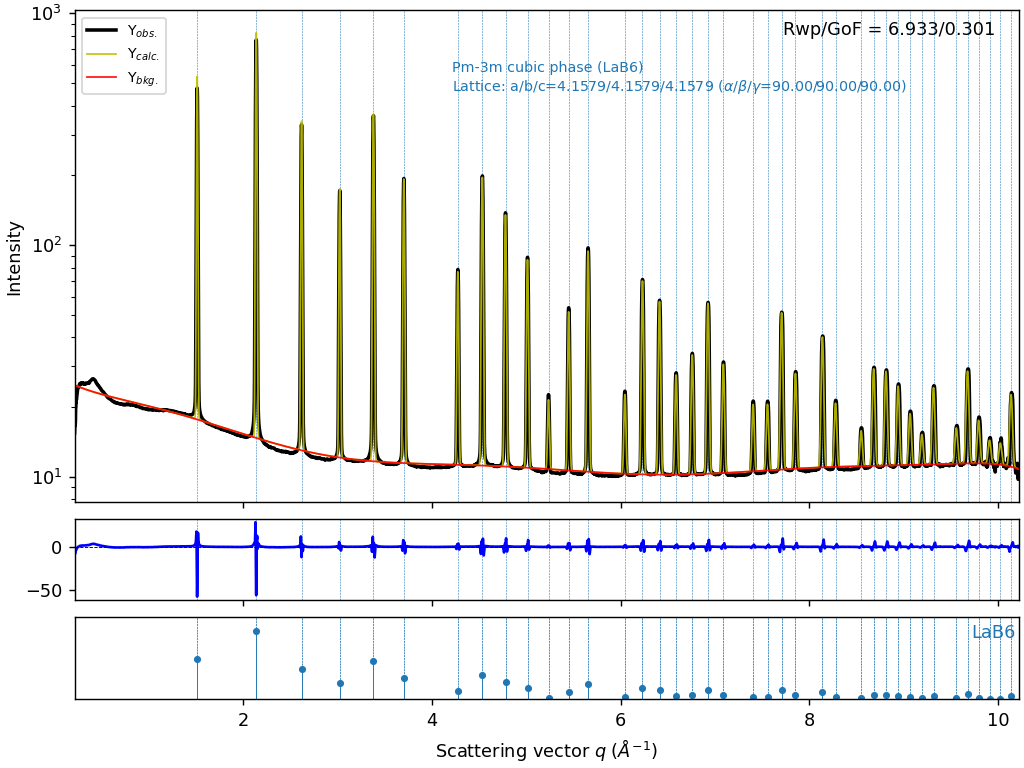

In [32]:
# Finally, we call .plot() method to see a better plot of the final refinement.

sample.plot()

# As seen below, the refined lattice constant of LaB6 is 4.1579 while it was 4.15489
# in the LaB6_structure_from_MaterialsProject.cif file.
# 4.1579 is in better agreement with the value of 4.156826 from here
# https://tsapps.nist.gov/srmext/certificates/660c.pdf


 ⏩--1st refinement with LeBail is completed. Rwp/GoF is 26.973/1.175 

 ✅--Background with 10 coeffs is refined. Rwp/GoF is now 20.362/0.888 (was 26.973(-24.51%)/1.175(-24.46%✨))
 ✅--Cell parameters are refined. Rwp/GoF is now 9.795/0.427 (was 20.362(-51.89%)/0.888(-51.92%✨))
 ✅--Instrument parameter ['U'] is refined. Rwp/GoF is now 7.529/0.328 (was 9.795(-23.14%)/0.427(-23.14%✨))
 ✅--Instrument parameter ['V'] is refined. Rwp/GoF is now 7.070/0.308 (was 7.529(-6.10%)/0.328(-6.10%))
 ✅--Instrument parameter ['W'] is refined. Rwp/GoF is now 6.817/0.297 (was 7.070(-3.58%)/0.308(-3.58%))
 ✅--Instrument parameter ['Zero'] is refined. Rwp/GoF is now 6.653/0.290 (was 6.817(-2.41%)/0.297(-2.41%))
 ✅--Cell parameters are refined. Rwp/GoF is now 6.617/0.288 (was 6.653(-0.54%)/0.290(-0.54%❗))
 ✅--Background with 15 coeffs is refined. Rwp/GoF is now 6.347/0.277 (was 6.617(-4.07%)/0.288(-3.99%))


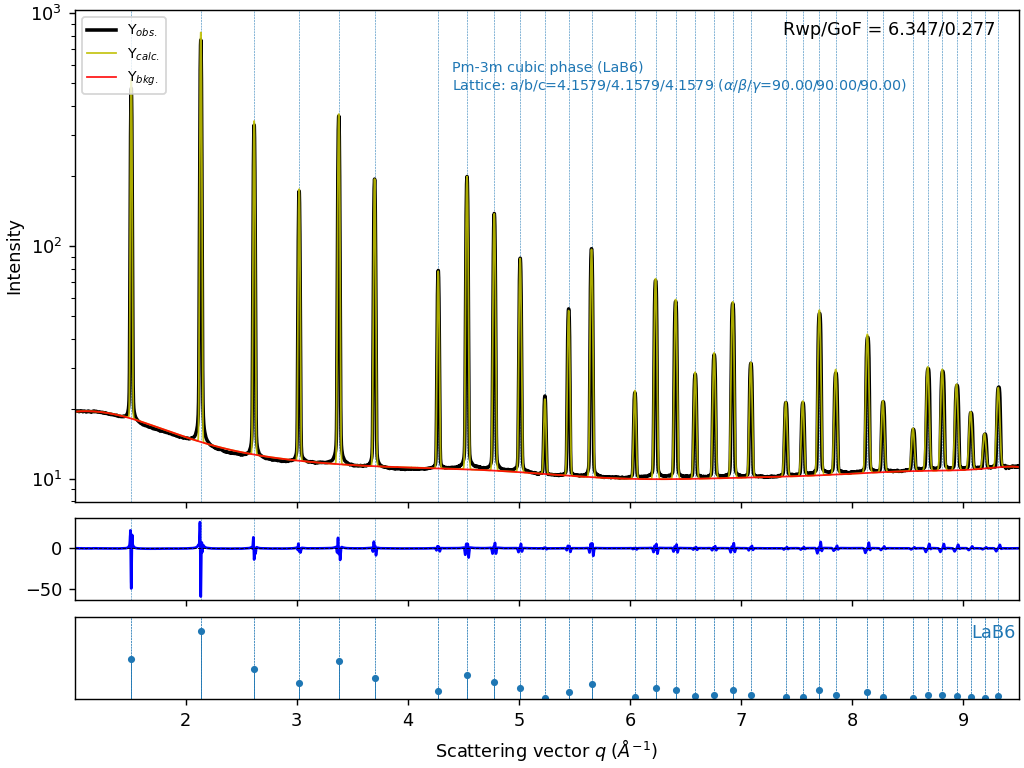

In [33]:
# The good thing with Jupyter notebooks is, we can do the entire refinement within a single cell as shown below.
# In order to simplify the notebook output, we set plot=False in some of the steps below. We also select scattering
# vector start from 1 as there are no peaks before and stop at 9.5 as the data gets noisy after that using the
# radial_range keyword. The symbol ✨ highlights that there is improvement more than %10 in GoF
# while ❗ highlights the change is less than 1% or positive.

sample = exrd()


sample.load_xrd_data(
    from_txt_file="LaB6_synchrotron_XRD_from_28ID-2.xy",
    txt_file_wavelength_in_angstrom=0.1814,
    plot=False,
    radial_range=[1, 9.5],
)

sample.load_phases(
    [{"cif": "LaB6_structure_from_MaterialsProject.cif", "label": "LaB6"}], plot=False
)
sample.setup_gsas2_refiner(plot=False)

sample.refine_background(plot=False)
sample.refine_cell_parameters(plot=False)
sample.refine_instrument_parameters(inst_pars_to_refine=["U"], plot=False)
sample.refine_instrument_parameters(inst_pars_to_refine=["V"], plot=False)
sample.refine_instrument_parameters(inst_pars_to_refine=["W"], plot=False)
sample.refine_instrument_parameters(inst_pars_to_refine=["Zero"], plot=False)

# We can re-refine background since we improved instrument parameters in previous steps
sample.refine_cell_parameters(plot=False)

# We can re-refine background with higher number of coefficients
sample.refine_background(num_coeffs=15, plot=False)

sample.plot()


# As in the final plot below, the refinement is fairly good. It should be noted that, this is
# LeBail refinement in which atom properties are not taken into consideration. Reitveld type
# refinement will be discussed in next notebook (02_intermediate.ipynb)

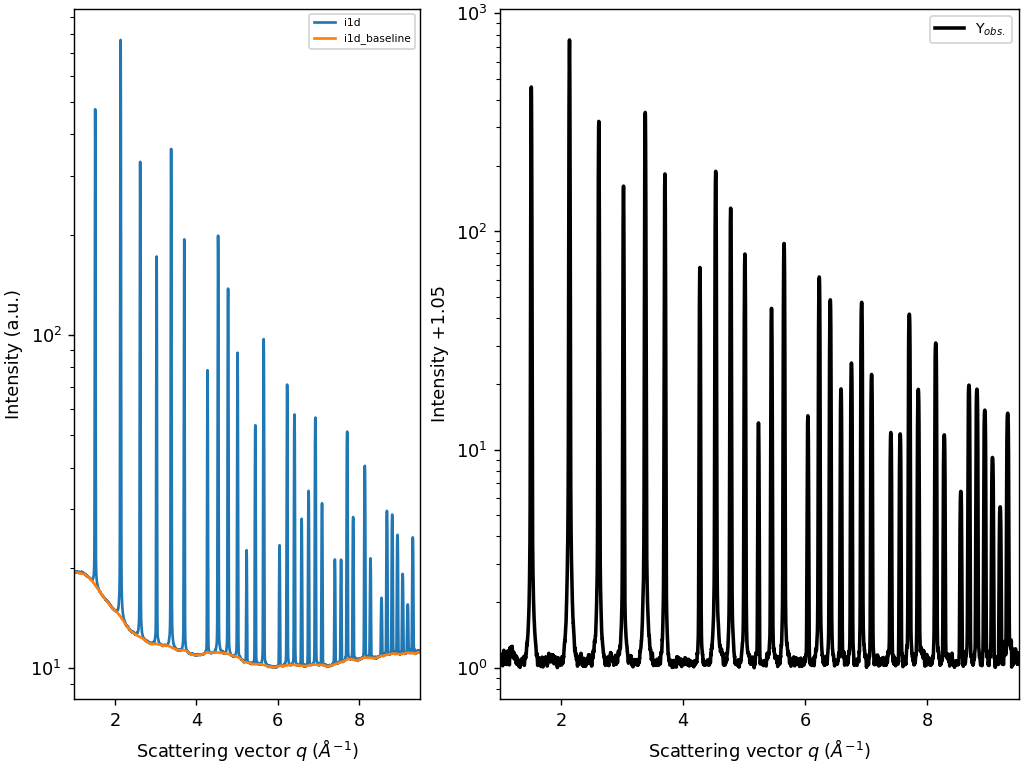

In [35]:
# We can estimate the background using pybaselines tools: https://pybaselines.readthedocs.io/en/latest/
# Beseline estimation is implemented in easyXRD as shown below.


sample = exrd()

sample.load_xrd_data(
    from_txt_file="LaB6_synchrotron_XRD_from_28ID-2.xy",
    txt_file_wavelength_in_angstrom=0.1814,
    plot=False,
    radial_range=[1, 9.5],
)

sample.get_baseline()

# The subplot on the right side below shows the baseline subtracted and log scaled data.

Another important feature of easyXRD is to pull structural information from Materials Project. This is useful when a cif file is not available or one needs to try multiple structures for phase identification. Next cell demonstrates this feature.

In order to access Materials Project, we need to provide an api key. You can get your own api key from

https://next-gen.materialsproject.org/api#api-key

It is a 32 character string and needs to be provided as shown below.

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

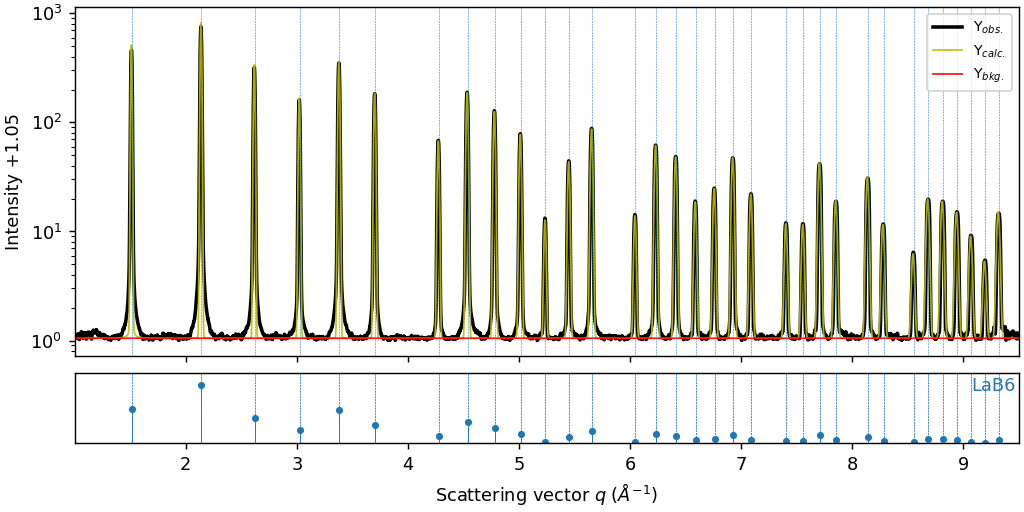

In [56]:
sample.load_phases(
    [{"mp_id": "mp-2680", "label": "LaB6"}],
    plot=True,
    mp_rester_api_key='....put-your-own-key-here....',
    )


# Note that we didn't provide a cif file here. It is retrieved from Materils Project entry
# `mp-2680` from https://next-gen.materialsproject.org/materials/mp-2680


 ⏩--1st refinement with LeBail is completed. Rwp/GoF is 24.421/0.341 

 ✅--Cell parameters are refined. Rwp/GoF is now 11.793/0.165 (was 24.421(-51.71%)/0.341(-51.71%✨))
 ✅--Instrument parameter ['U'] is refined. Rwp/GoF is now 9.097/0.127 (was 11.793(-22.86%)/0.165(-22.86%✨))
 ✅--Instrument parameter ['V'] is refined. Rwp/GoF is now 8.560/0.120 (was 9.097(-5.90%)/0.127(-5.90%))
 ✅--Instrument parameter ['W'] is refined. Rwp/GoF is now 8.217/0.115 (was 8.560(-4.00%)/0.120(-4.00%))
 ✅--Instrument parameter ['Zero'] is refined. Rwp/GoF is now 7.893/0.110 (was 8.217(-3.94%)/0.115(-3.94%))
 ✅--Cell parameters are refined. Rwp/GoF is now 7.841/0.110 (was 7.893(-0.66%)/0.110(-0.66%❗))


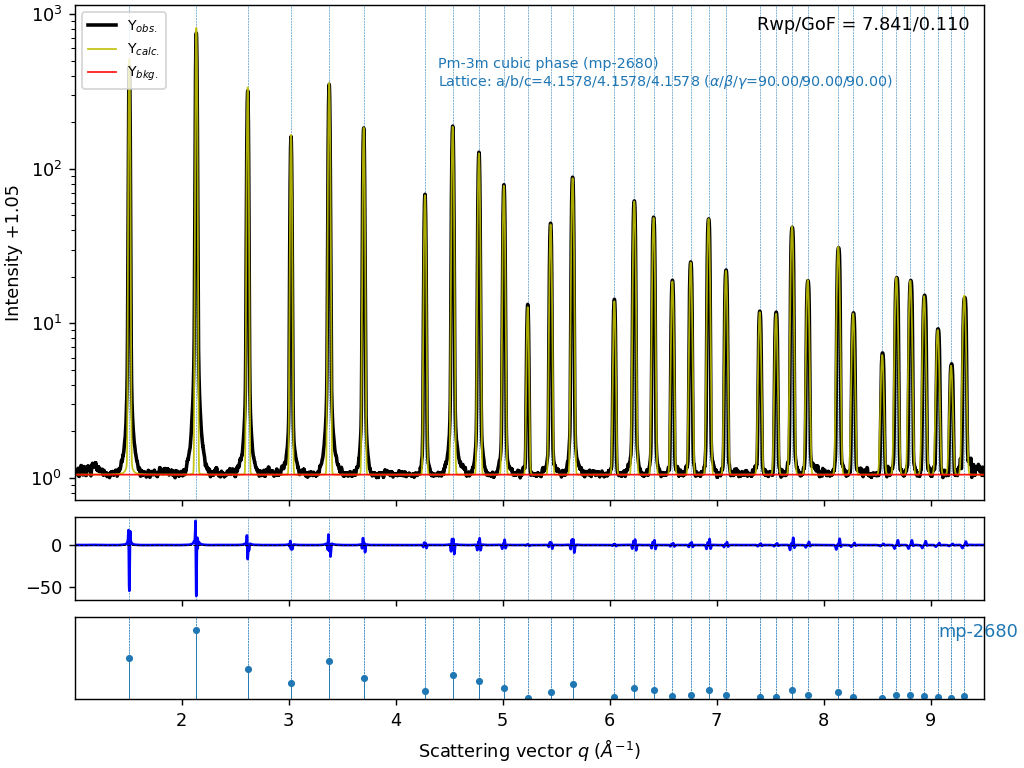

In [45]:
# Now we can re-refine new data (baseline subtracted and structure from materials project)

sample.setup_gsas2_refiner(plot=False, normalize=True)

sample.refine_cell_parameters(plot=False)
sample.refine_instrument_parameters(inst_pars_to_refine=["U"], plot=False)
sample.refine_instrument_parameters(inst_pars_to_refine=["V"], plot=False)
sample.refine_instrument_parameters(inst_pars_to_refine=["W"], plot=False)
sample.refine_instrument_parameters(inst_pars_to_refine=["Zero"], plot=False)

sample.refine_cell_parameters(plot=False)

sample.plot()

# Note that the baseline subtracted refinement has larger Rwp than the previous refinement. This doesn't mean the new
# refinement is worse. See notes below on this:
# https://www.aps.anl.gov/sites/default/files/APS-Uploads/XSD/Powder-Diffraction-Crystallography/7JudgingQuality.pdf
# http://x-ray.ucsd.edu/mediawiki/images/6/61/Toby_Rfactors.pdf


In [54]:
# If you want to continue with playing data using GSAS-II graphical program, you can easily download
# the last state of gsas project as below.

sample.export_gpx_to('LaB6.gpx')

from google.colab import files
files.download('LaB6.gpx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
# As an excercise, you can upload your own xrd file and refine it using the procedure explained above.

files.upload();